In [37]:
#importing necessary libraries
import os
import cv2
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from matplotlib.image import imread
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
# Set the path to your dataset
dataset_path = "malaria_classification/cell_images" 

In [3]:
# Function to load and preprocess images
def load_and_preprocess_images(folder_path, label):
    images = []
    labels = []

    for filename in os.listdir(folder_path):
        if filename.endswith(".png"):
           
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            img = img / 255.0
            images.append(img)
            labels.append(label)

    return np.array(images,dtype=np.float32), np.array(labels)

In [4]:
# Load and preprocess infected (parasitized) images
infected_path = os.path.join(dataset_path, "Parasitized")
infected_images, infected_labels = load_and_preprocess_images(infected_path, label=1)


In [5]:
# Load and preprocess uninfected images
uninfected_path = os.path.join(dataset_path, "Uninfected")
uninfected_images, uninfected_labels = load_and_preprocess_images(uninfected_path, label=0)


In [6]:
infected_path = os.path.join(dataset_path, "Parasitized")
infected_path1=os.listdir("malaria_classification/cell_images/Parasitized")
print(infected_path1[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


Parasitized cell images


(148, 142, 3)
(208, 148, 3)
(151, 139, 3)
(154, 145, 3)
(154, 133, 3)


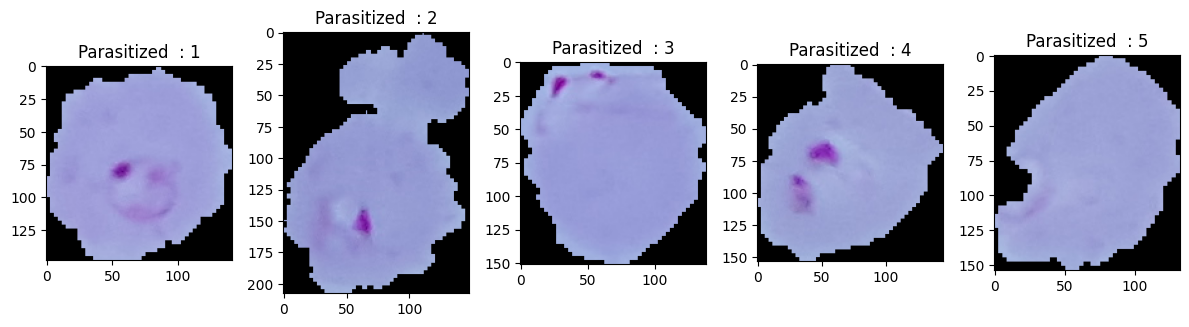

In [7]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("malaria_classification/cell_images/Parasitized" + "/" + infected_path1[i])
    plt.imshow(img)
    plt.title('Parasitized  : {i}'.format(i=i+1))
    plt.tight_layout()
    print(img.shape)
plt.show()

In [8]:
uninfected_path1=os.listdir("malaria_classification/cell_images/Uninfected")
print(uninfected_path1[:10]) 

['C1_thinF_IMG_20150604_104722_cell_115.png', 'C1_thinF_IMG_20150604_104722_cell_123.png', 'C1_thinF_IMG_20150604_104722_cell_143.png', 'C1_thinF_IMG_20150604_104722_cell_15.png', 'C1_thinF_IMG_20150604_104722_cell_164.png', 'C1_thinF_IMG_20150604_104722_cell_191.png', 'C1_thinF_IMG_20150604_104722_cell_211.png', 'C1_thinF_IMG_20150604_104722_cell_216.png', 'C1_thinF_IMG_20150604_104722_cell_231.png', 'C1_thinF_IMG_20150604_104722_cell_242.png']


(100, 136, 3)
(136, 151, 3)
(106, 121, 3)
(142, 133, 3)
(130, 136, 3)


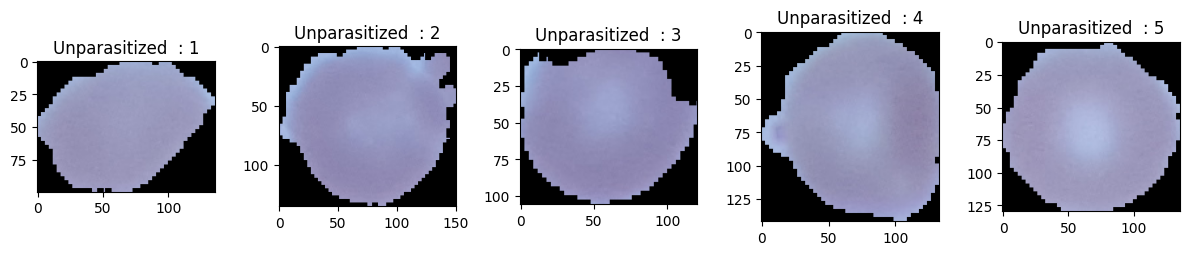

In [9]:
plt.figure(figsize = (12,12))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("malaria_classification/cell_images/Uninfected" + "/" + uninfected_path1[i+1])
    plt.imshow(img)
    plt.title('Unparasitized  : {i}'.format(i=i+1))
    plt.tight_layout()
    print(img.shape)
plt.show()

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


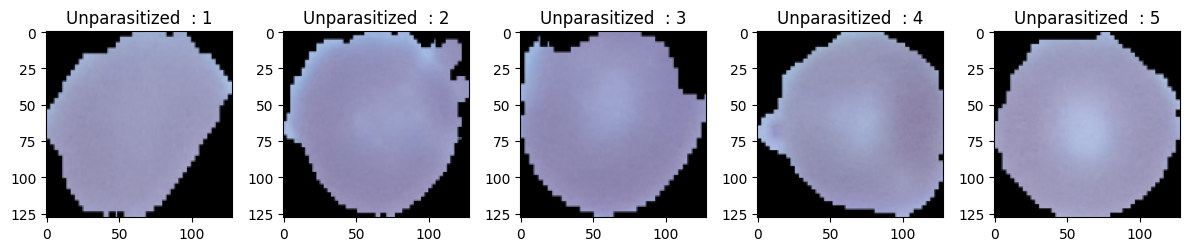

In [10]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("malaria_classification/cell_images/Uninfected" + "/" + uninfected_path1[i+1])
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    plt.imshow(img)
    plt.title('Unparasitized  : {i}'.format(i=i+1))
    plt.tight_layout()
    print(img.shape)
plt.show()

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


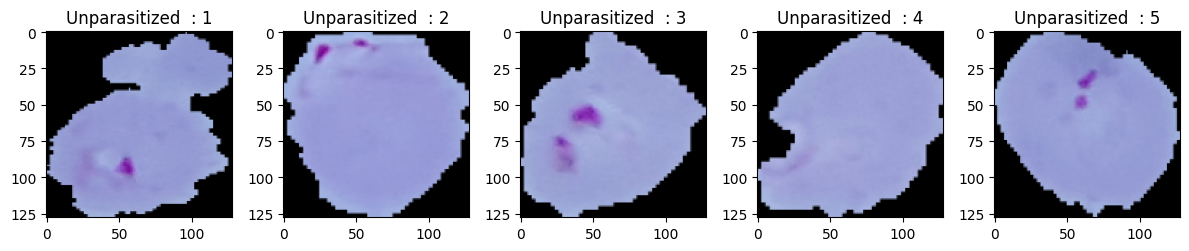

In [11]:
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread("malaria_classification/cell_images/Parasitized" + "/" + infected_path1[i+1])
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    plt.imshow(img)
    plt.title('Unparasitized  : {i}'.format(i=i+1))
    plt.tight_layout()
    print(img.shape)
plt.show()

In [12]:
# Combine infected and uninfected data
all_images = np.concatenate([infected_images, uninfected_images])
all_labels = np.concatenate([infected_labels, uninfected_labels])

In [13]:
# Split the dataset into training, validation, and test sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42)


val_images, test_images, val_labels, test_labels = train_test_split(
    test_images, test_labels, test_size=0.5, random_state=42)


# Print the shapes of the datasets
print("Train set:", train_images.shape, train_labels.shape)
print("Validation set:", val_images.shape, val_labels.shape)
print("Test set:", test_images.shape, test_labels.shape)

Train set: (22046, 128, 128, 3) (22046,)
Validation set: (2756, 128, 128, 3) (2756,)
Test set: (2756, 128, 128, 3) (2756,)


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator



batch_size=32
# Create an instance of the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Create data generators for training and validation sets
train_datagen = datagen.flow(train_images, train_labels, batch_size=batch_size, shuffle=True)
val_datagen = datagen.flow(val_images, val_labels, batch_size=batch_size, shuffle=False)


In [15]:
#Modified Model Architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Added dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Added dropout for regularization
model.add(Dense(1, activation='sigmoid'))

2024-01-07 18:25:37.458263: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [16]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                        

In [17]:
# Model Training
history=model.fit(train_datagen, epochs=10, validation_data=val_datagen)


Epoch 1/10
689/689 [==============================] - 156s 224ms/step - loss: 0.9901 - accuracy: 0.5476 - val_loss: 0.6638 - val_accuracy: 0.5998
Epoch 2/10
689/689 [==============================] - 143s 207ms/step - loss: 0.5709 - accuracy: 0.7002 - val_loss: 0.8289 - val_accuracy: 0.5098
Epoch 3/10
689/689 [==============================] - 143s 208ms/step - loss: 0.3139 - accuracy: 0.8870 - val_loss: 0.3031 - val_accuracy: 0.8828
Epoch 4/10
689/689 [==============================] - 140s 204ms/step - loss: 0.2729 - accuracy: 0.9059 - val_loss: 0.2764 - val_accuracy: 0.9042
Epoch 5/10
689/689 [==============================] - 138s 200ms/step - loss: 0.2589 - accuracy: 0.9123 - val_loss: 0.3724 - val_accuracy: 0.8549
Epoch 6/10
689/689 [==============================] - 137s 199ms/step - loss: 0.2455 - accuracy: 0.9190 - val_loss: 0.4122 - val_accuracy: 0.8509
Epoch 7/10
689/689 [==============================] - 137s 199ms/step - loss: 0.2334 - accuracy: 0.9246 - val_loss: 0.4608 -

In [18]:
# Model Evaluation on Test Set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Accuracy: {test_accuracy}')


87/87 [==============================] - 3s 33ms/step - loss: 12.1646 - accuracy: 0.8774
Test Accuracy: 0.8773584961891174


In [19]:
from sklearn.metrics import classification_report, confusion_matrix

y_predictions = model.predict(test_images)
y_predictions_classes = np.round(y_predictions)

# Get true labels
cnn_true_labels = test_labels

# Print classification report
print("CNN Classification Report:\n", classification_report(cnn_true_labels,y_predictions_classes))

87/87 [==============================] - 3s 33ms/step
CNN Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      1364
           1       0.89      0.87      0.88      1392

    accuracy                           0.88      2756
   macro avg       0.88      0.88      0.88      2756
weighted avg       0.88      0.88      0.88      2756



In [20]:
# Print confusion matrix
print("CNN Confusion Matrix:\n", confusion_matrix(cnn_true_labels, y_predictions_classes))

CNN Confusion Matrix:
 [[1212  152]
 [ 186 1206]]


In [21]:
model.save("malaria_classification/cnn_modeln.h5")

/jupyter/anoop/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
# Function to preprocess a single image for prediction
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))  # Adjust the size as needed
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the image you want to predict
image_path = 'malaria_classification/cell_images/Uninfected/C99P60ThinF_IMG_20150918_142128_cell_53.png'

# Preprocess the image
input_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(input_image)

# Convert predictions to class labels
predicted_class = "Parasitized" if predictions[0][0] > 0.5 else "Uninfected"

# Print the predicted class
print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 38ms/step
Predicted Class: Uninfected


In [23]:
print (predictions)

[[0.]]


In [24]:
# Function to preprocess a single image for prediction
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))  # Adjust the size as needed
    img = img / 255.0  # Normalize pixel values to the range [0, 1]
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the image you want to predict
image_path = "malaria_classification/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"

# Preprocess the image
input_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(input_image)

# Convert predictions to class labels
predicted_class = "Parasitized" if predictions[0][0] > 0.5 else "Uninfected"

# Print the predicted class
print("Predicted Class:", predicted_class)


1/1 [==============================] - 0s 35ms/step
Predicted Class: Parasitized


In [25]:
print (predictions)

[[1.]]


<Figure size 640x480 with 0 Axes>

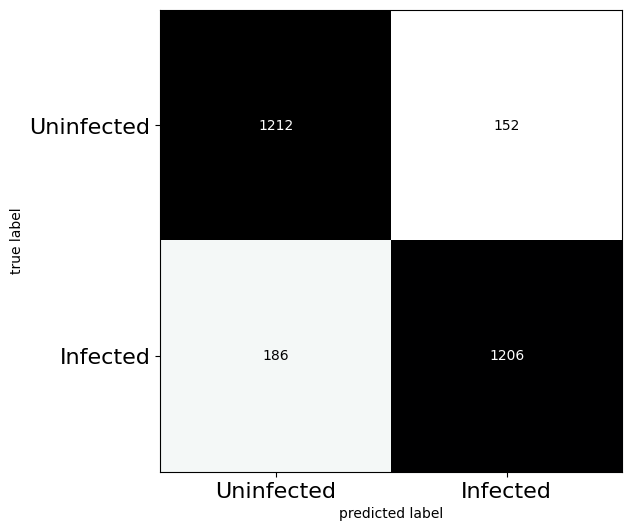

In [26]:
conf_matrix=confusion_matrix(cnn_true_labels , y_predictions_classes)
plt.figure()
plot_confusion_matrix(conf_matrix, figsize=(6,6), hide_ticks=True, cmap=plt.cm.bone_r)
plt.xticks(range(2), ['Uninfected', 'Infected'], fontsize=16)
plt.yticks(range(2), ['Uninfected', 'Infected'], fontsize=16)
plt.show()

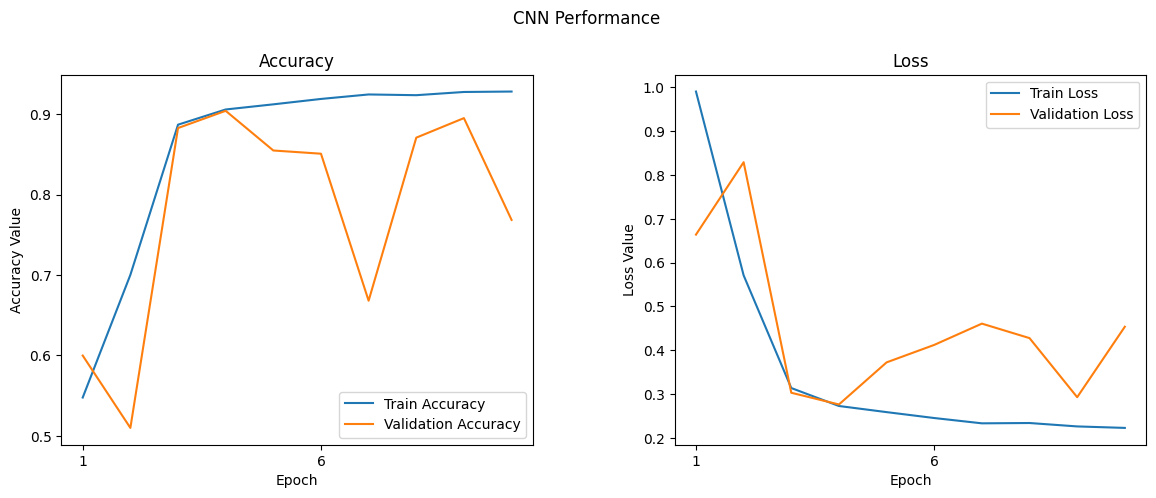

In [27]:
def plot_training_history(history):
   
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle('CNN Performance', fontsize=12)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    # Extract the number of epochs and create a list of epoch numbers
    max_epoch = len(history.history['accuracy'])
    epoch_list = list(range(1, max_epoch + 1))

    # Plot training and validation accuracy
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(1, max_epoch + 1, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    ax1.legend(loc="best")

    # Plot training and validation loss
    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(1, max_epoch + 1, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    ax2.legend(loc="best")

    # Display the plots
    plt.show()

# Call the function to plot
plot_training_history(history)

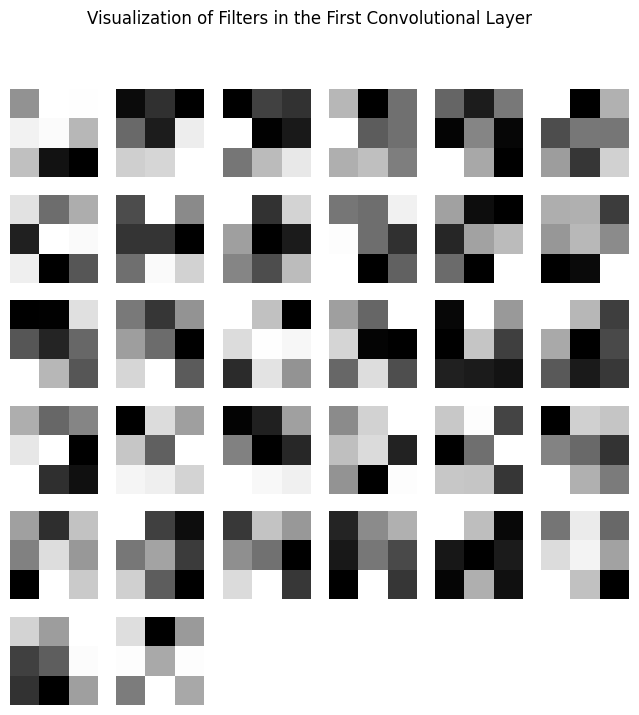

In [28]:
# Retrieve the filters from the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Normalize the filters for better visualization
filters = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))

# Number of filters in the first layer
n_filters = filters.shape[3]

# Plot each filter
plt.figure(figsize=(8, 8))
for i in range(n_filters):
    plt.subplot(6, 6, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
    
plt.suptitle('Visualization of Filters in the First Convolutional Layer')
plt.show()

In [29]:
model1 = load_model("malaria_classification/cnn_model1.h5")

In [32]:
# Choose the last convolutional layer for activation maps
layer_name = 'conv2d_1'

# Create a model that outputs the activations of the chosen layer
activation_model = Model(inputs=model1.input, outputs=model1.get_layer(layer_name).output)

# Load and preprocess an example image
img_path = "malaria_classification/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"  # Replace with the path to your image
img = image.load_img(img_path, target_size=(128, 128))  # Adjust the target size based on your model's input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Get the activations for the chosen layer
activations = activation_model.predict(img_array)

# Visualize the activation maps
n_filters = activations.shape[-1]




1/1 [==============================] - 0s 59ms/step


In [33]:
print(n_filters)

64


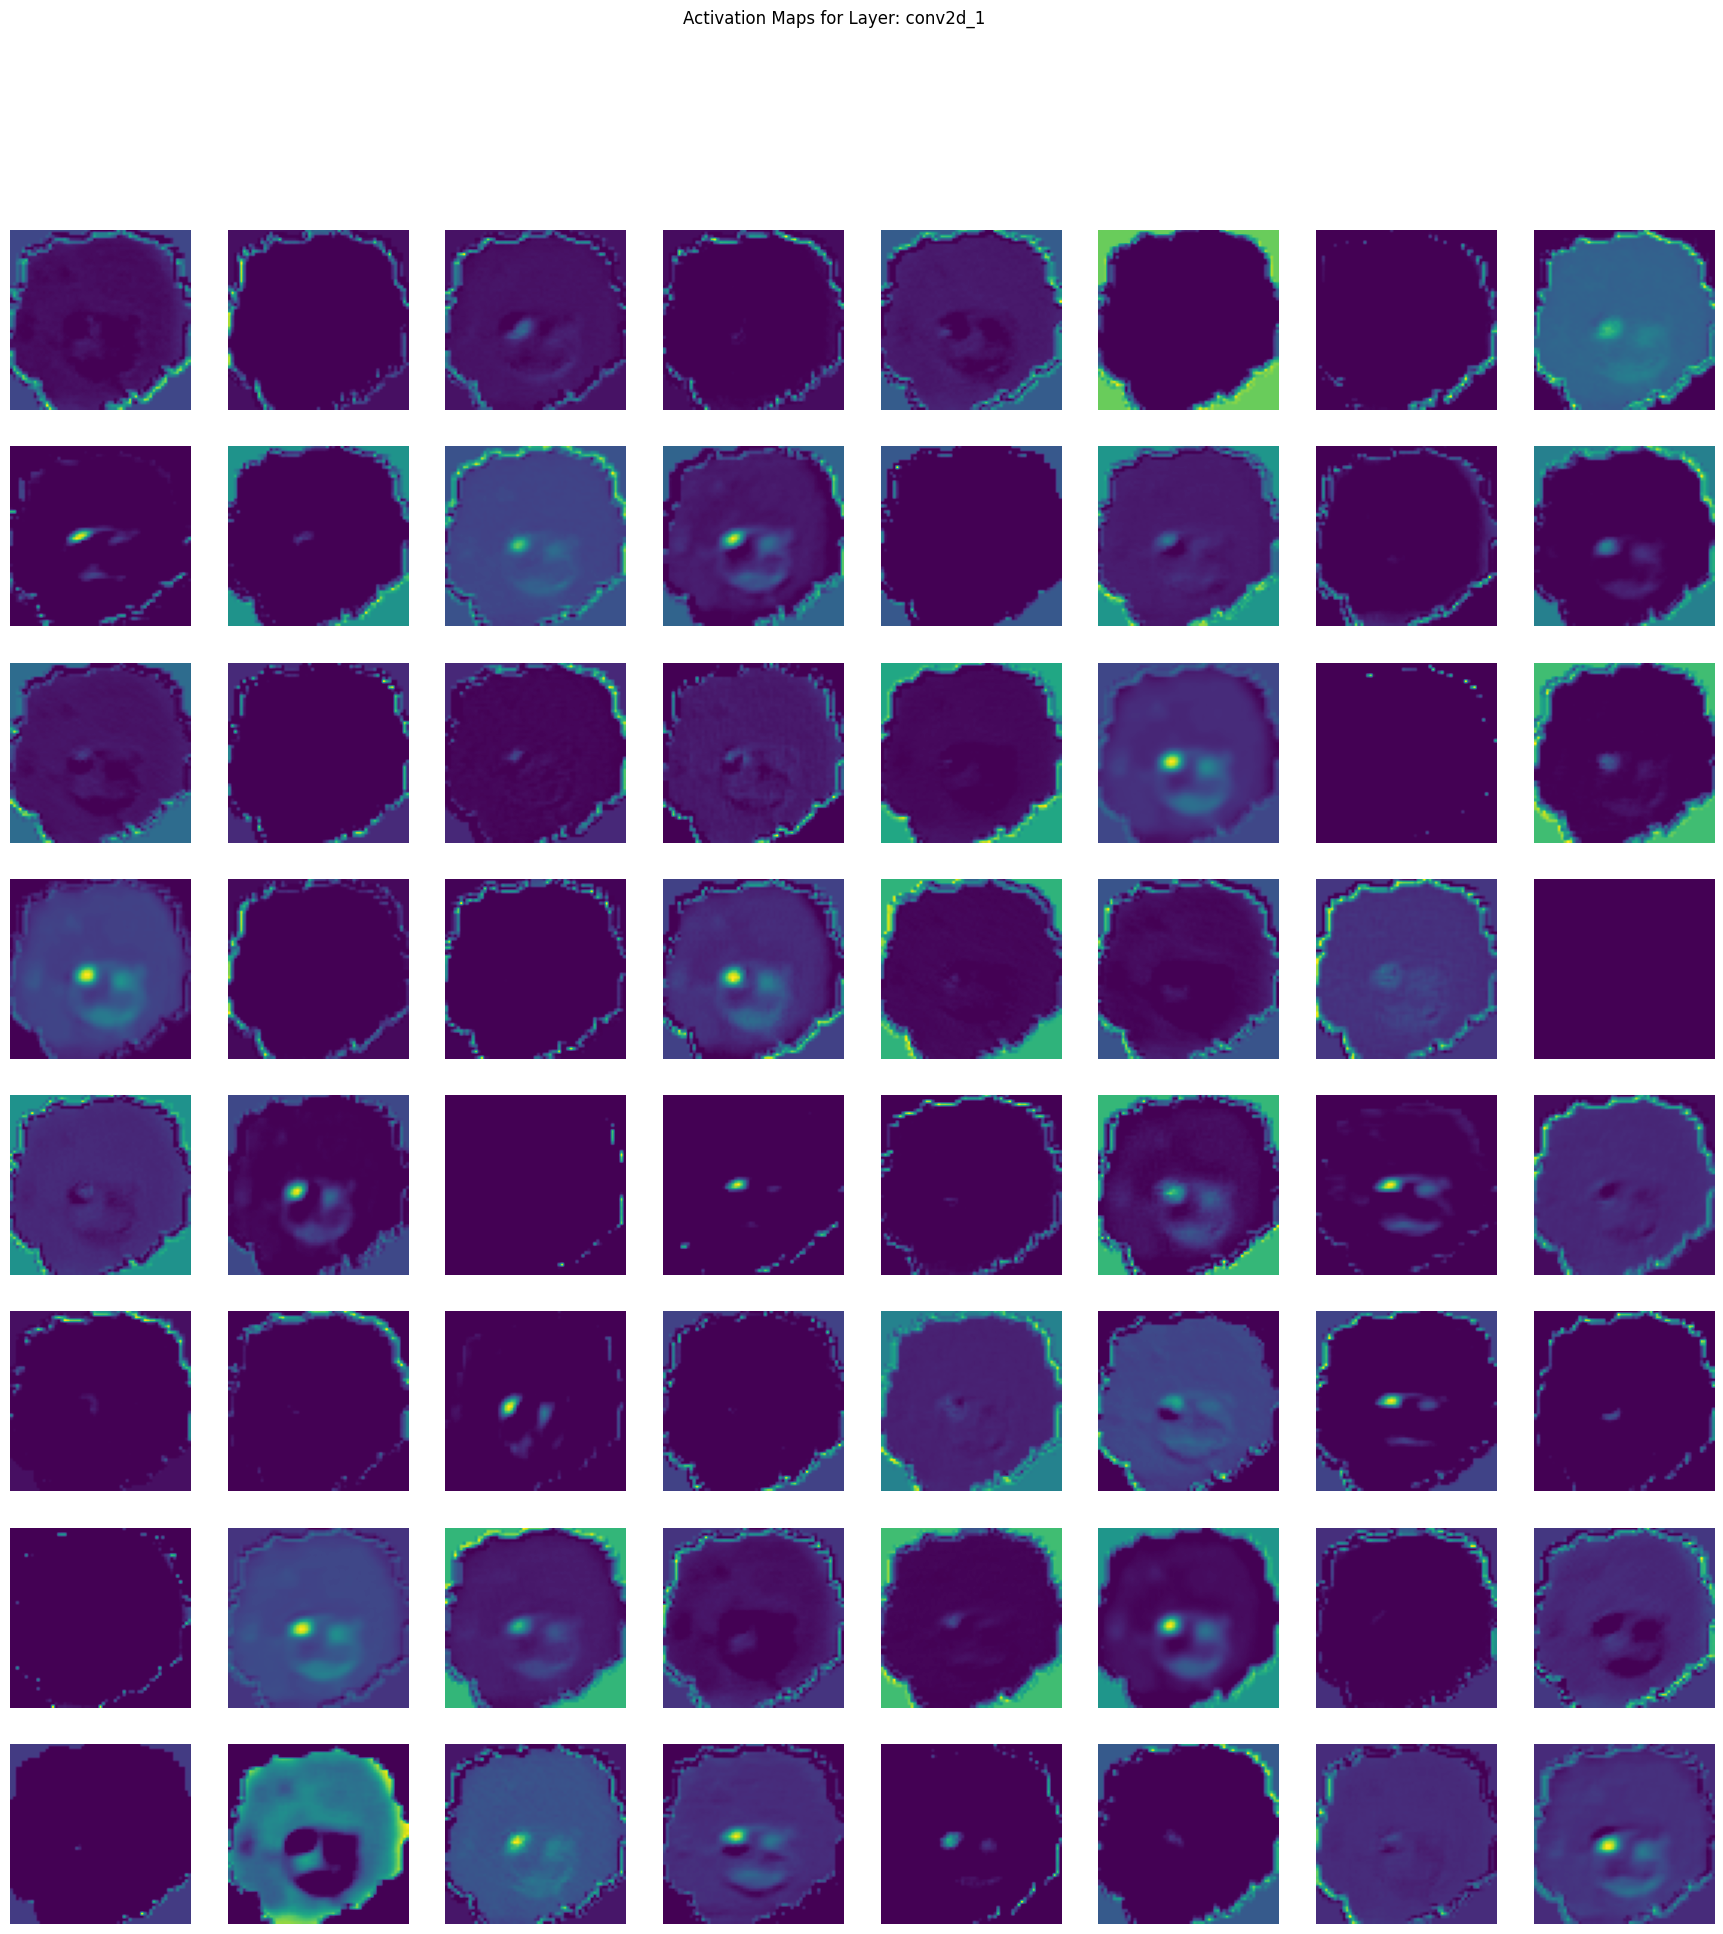

In [34]:
plt.figure(figsize=(22, 22))
# Calculate the number of rows and columns based on the number of filters
n_filters=64
rows = int(np.sqrt(n_filters))
cols = int(np.ceil(n_filters / rows))


for i in range(n_filters):
    plt.subplot(rows, cols, i+1)
    plt.imshow(activations[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.suptitle(f'Activation Maps for Layer: {layer_name}')
plt.show()

1/1 [==============================] - 0s 74ms/step


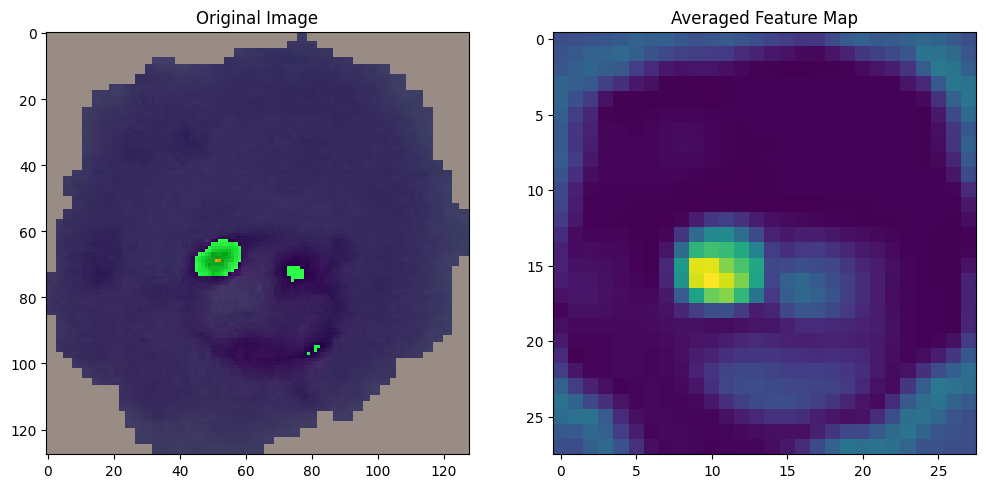

In [38]:
last_conv_layer = model1.get_layer('conv2d_2')

# Create a model that outputs the feature maps
feature_map_model = tf.keras.models.Model(inputs=model1.inputs, outputs=last_conv_layer.output)

# Load and preprocess an example image
img_path = "malaria_classification/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png"  # Replace with the path to an example image
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

# Get the feature maps
feature_maps = feature_map_model.predict(img_array)

# Average the feature maps along the channel axis
average_feature_map = np.mean(feature_maps, axis=-1)

# Display the original image and averaged feature map
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_array[0].astype('uint8'))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(average_feature_map[0], cmap='viridis')
plt.title('Averaged Feature Map')

plt.show()